# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


#### Kjersti Stangeland, fall 2025

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


__Answer a):__

The optimal parameters can be written as: 
$$\boldsymbol{\hat{\beta}_{OLS}} = (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T y}$$
$$ = (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T (X \beta + \epsilon} )$$
$$=(\boldsymbol{X^T X})^{-1}\boldsymbol{X^T X \beta} + (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T \epsilon}$$

As $(\boldsymbol{X^T X})^{-1}\boldsymbol{X^T X} = \bold I$, we have:

$$\boldsymbol{\hat{\beta}_{OLS}} = \boldsymbol{\beta} + (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T \epsilon}$$

Finding the expected value of this, yields:

$$\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \mathbb{E}(\boldsymbol{\beta} + (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T \epsilon})$$

as $\mathbb{E}(\epsilon) = 0$ and the other variables are deterministic (not random), $\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}$.

**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


__Answer b):__

From the previous exercise, we have that $\boldsymbol{\hat{\beta}_{OLS}} = \boldsymbol{\beta} + (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T \epsilon}$.

Again, $\beta$ is deterministic and has no variance. However, $\epsilon$ has a normal distribution with mean $0$ and variance $\sigma^2$. To derive the expression of the variance, I will use the relation which is for a constant matrix $\bold A$ and a random vector $\bold z$, $\mathbf{Var}(\boldsymbol{Az}) = \bold A \mathbf{Var}(\bold y) \bold A^T$. In this case, $\bold A = (\boldsymbol{\boldsymbol{X^T X})^{-1}\boldsymbol{X^T}}$ and $\bold z = \epsilon$.

$$\mathbf{Var}(\hat{\beta}_{OLS}) = \mathbf{Var}((\boldsymbol{X^T X})^{-1}\boldsymbol{X^T \epsilon}) = (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T} \mathbf{Var}(\epsilon) ((\boldsymbol{X^T X})^{-1}\boldsymbol{X^T})^T $$

$\mathbf{Var}(\epsilon) = \sigma^2 \bold I$ and so, 

$$\mathbf{Var}(\hat{\beta}_{OLS}) = (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T} \sigma^2 \bold I ((\boldsymbol{X^T X})^{-1}\boldsymbol{X^T})^T

= \sigma^2 (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T} ((\boldsymbol{X^T X})^{-1}\boldsymbol{X^T})^T

= \sigma^2 (\boldsymbol{X^T X})^{-1}\boldsymbol{X^T} \boldsymbol{X}(\boldsymbol{X^T X})^{-1} = \sigma^2 (\boldsymbol{X^T X})^{-1}
$$



We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that

$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


__Answer a):__
The optimal parameters can be written as: 
$$\boldsymbol{\hat{\beta}_{Ridge}} = (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T} \bold{y}$$

$$\mathbb{E}[\hat{\beta}_{Ridge}] = (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T} \mathbb{E}[\bold{y}]$$

$\mathbb{E}[\bold{y}] = \mathbb{E}[\boldsymbol{X \beta + \epsilon}] = \boldsymbol{X \beta} \mathbb{E}[\epsilon] = \boldsymbol{X \beta}$, and so

$$\mathbb{E}[\hat{\beta}_{Ridge}] = (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T} \boldsymbol{X \beta}$$


**b)** Why do we say that Ridge regression gives a biased estimate? Is this a problem?


__Answer b):__
The Ridge estimator is biased as it does not equal $\beta$, unless $\lambda = 0$. The hyperparameter introduces a bias as the model penalizes large values, and thus has a tendency to move towards smaller values.

**c)** Show that the variance is

$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$

__Answer c):__

$$\boldsymbol{\hat{\beta}_{Ridge}} = (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T} \bold{y}$$
$$= (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T} (\boldsymbol{X\beta + \epsilon})$$
$$ = (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T}\boldsymbol{X\beta} + (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T}\boldsymbol{\epsilon}$$

So only the latter term is stochastic and contributes to the variance. Now I'm using the same 'trick' as in 1 b), with: $\mathbf{Var}(\boldsymbol{Az}) = \bold A \mathbf{Var}(\bold y) \bold A^T$.

$$\mathbf{Var}[\boldsymbol{\hat{\beta}_{Ridge}}] = \mathbf{Var}[(\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T}\boldsymbol{\epsilon}]$$

$$= \sigma^2 (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T} ((\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T})^T$$
$$= \sigma^2 (\bold{X^T}\bold{X} + \lambda \bold{I})^{-1}\bold{X^T} \bold X((\bold{X^T}\bold{X} + \lambda \bold{I})^{-1})^T$$

We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$

**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and 

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

This wasnt exactly what I was supposed to show, but after some hours stuck on this I'll let it be.

__Answer a)__:
We have $C(\boldsymbol{X},\boldsymbol{\beta}) = \mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]$.

$$\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = \mathbb{E}[(\boldsymbol{y^2 - 2 y \tilde{y} + \tilde{y}^2})]$$

$$= \mathbb{E}[\boldsymbol{y^2}] - 2\mathbb{E}[\boldsymbol{y \tilde{y}}] + \mathbb{E}[\boldsymbol{\tilde{y}^2}]$$

Now looking into the terms separately. The first term can be rewritten by inserting one of the first assumptions we made, that $\boldsymbol{y} = f + \epsilon$. And, as $f$ is non-stochastic and independent of $\epsilon$, in addition to the assumption that $\mathbb{E}[\epsilon] = 0$ and $\mathbb{E}[\epsilon^2] = \sigma^2$, we get:

$$\mathbb{E}[\boldsymbol{y^2}] = \mathbb{E}[(f + \epsilon)^2] = \mathbb{E}[f^2] + 2\mathbb{E}[f\epsilon] + \mathbb{E}[\epsilon^2]$$
$$= f^2 + \sigma^2$$

Then, for the second term we have that
$$\mathbb{E}[\boldsymbol{y \tilde{y}}] = \mathbb{E}[\boldsymbol{(f + \epsilon) \tilde{y}}] 
= \mathbb{E}[\boldsymbol{f\tilde{y} + \epsilon \tilde{y} }]$$

$$
= \mathbb{E}[\boldsymbol{f\tilde{y}}] + \mathbb{E}[\boldsymbol{\epsilon \tilde{y}}]
= f \mathbb{E[\boldsymbol{\tilde{y}}]}
$$



Lastly, we have per definition that $\text{Var}(X) = \mathbb{E}[X^2] - \mu_x^2$, so the last term is:

$$\mathbb{E}[\boldsymbol{\tilde{y}^2}] = \text{Var}(\boldsymbol{\tilde{y}}) + \mathbb{E}[\boldsymbol{\tilde{y}}]^2$$

Gathering the terms leaves us with:

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = f^2 -2(f \mathbb{E[\boldsymbol{\tilde{y}}]}) + \mathbb{E}[\boldsymbol{\tilde{y}}]^2+ \text{Var}(\boldsymbol{\tilde{y}}) + \sigma^2
$$

$$
= \mathbb{E}[(f - \mathbb{E}[\boldsymbol{\tilde{y}}])^2] + \text{Var}(\boldsymbol{\tilde{y}}) + \sigma^2
$$


And by approximating that $f(x) \approx \boldsymbol{y}$, we have:

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = \text{Bias}(\boldsymbol{\tilde{y}}) + \text{Var}(\boldsymbol{\tilde{y}}) + \sigma^2
$$

**b)** Explain what the terms mean and discuss their interpretations.


__Answer b):__
* The variance of the model gives an estimate on the spread in the model data (not compared to the target data). A small variance means that the model values are close together around the model mean, whereas a large variance would mean a lot of scatter in the model.
* The bias term indicates how far off the model mean is from the true mean.
* The variance of the noise can be interpreted as the noise in the noise, how scattered the noise itself is from its mean zero.

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [1]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
targets = np.random.rand(bootstraps, n)

pred_mean = np.mean(predictions)

mse = np.mean((predictions-targets)**2)
bias = np.mean((targets - pred_mean)**2)
variance = np.mean((predictions - pred_mean)**2)

In [2]:
print(f'Target mean {np.mean(targets)}')
print(f'Prediction mean {pred_mean}')
print(f'MSE: {mse}')
print(f'Bias {bias}')
print(f'Variance: {variance}')
print(f'Checking MSE = bias + variance: {bias+variance}')

Target mean 0.49956813884108575
Prediction mean 14.983596625032495
MSE: 218.22840913547776
Bias 209.87032080188817
Variance: 8.352740537687763
Checking MSE = bias + variance: 218.22306133957593


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.


In [3]:
# Increase in bias would mean to move the prediction mean further away from the target
# Decrease the variance would mean less scatter in the predictions

predictions = np.random.rand(bootstraps, n) * 0.1 + 100
targets = np.random.rand(bootstraps, n)

pred_mean = np.mean(predictions)

mse = np.mean((predictions-targets)**2)
bias = np.mean((targets - pred_mean)**2)
variance = np.mean((predictions - pred_mean)**2)

In [4]:
print(f'Target mean {np.mean(targets)}')
print(f'Prediction mean {pred_mean}')
print(f'MSE: {mse}')
print(f'Bias {bias}')
print(f'Variance: {variance}')
print(f'Checking MSE = bias + variance: {bias+variance}')

Target mean 0.5006094887802561
Prediction mean 100.0501281119227
MSE: 9910.190911722695
Bias 9910.190017724564
Variance: 0.0008332936978540894
Checking MSE = bias + variance: 9910.190851018262


**c)** Change the prediction values in some way to increase the variance while decreasing the bias.

In [5]:
# Decrease in bias would mean to move the prediction mean closer to the target
# Inrease the variance would mean more scatter in the predictions
predictions = np.random.rand(bootstraps, n) * 100 - 50
targets = np.random.rand(bootstraps, n)

pred_mean = np.mean(predictions)

mse = np.mean((predictions-targets)**2)
bias = np.mean((targets - pred_mean)**2)
variance = np.mean((predictions - pred_mean)**2)

In [6]:
print(f'Target mean {np.mean(targets)}')
print(f'Prediction mean {pred_mean}')
print(f'MSE: {mse}')
print(f'Bias {bias}')
print(f'Variance: {variance}')
print(f'Checking MSE = bias + variance: {bias+variance}')

Target mean 0.499968405541761
Prediction mean 0.03869006963511668
MSE: 832.0738157244494
Bias 0.29630552149903056
Variance: 831.7993794229205
Checking MSE = bias + variance: 832.0956849444195


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

Struggled a bit here so spent some time copying the lecture notes and understanding whats going on.

In [37]:
n = 400
bootstraps = 100
max_degree = 14

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1, x.shape)

error = np.zeros(max_degree)
bias = np.zeros(max_degree)
variance = np.zeros(max_degree)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in np.arange(max_degree):
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(x_train)
    X_test = poly.transform(x_test)

    y_pred = np.empty((y_test.shape[0], bootstraps))

    for i in range(bootstraps):
        X_res, y_res = resample(X_train, y_train)
        model = LinearRegression(fit_intercept=False).fit(X_res, y_res)
        y_pred[:, i] = model.predict(X_test).ravel()

    error[degree] = np.mean((y_test - y_pred)**2)
    bias[degree] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)
    variance[degree] = np.mean(np.var(y_pred, axis=1))

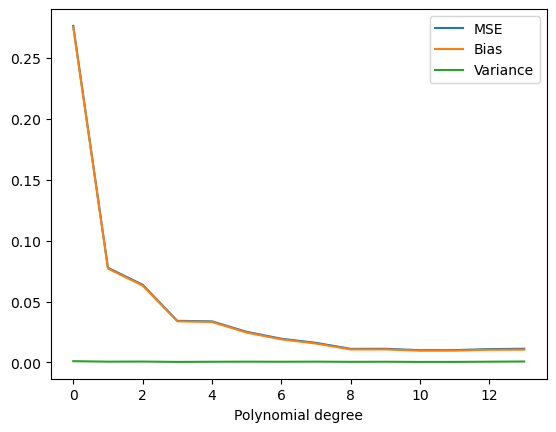

In [39]:
plt.plot(error, label='MSE')
plt.plot(bias, label='Bias')
plt.plot(variance, label='Variance')

plt.xlabel('Polynomial degree')

plt.legend()

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).


* Overfitting: Low bias, high variance. Happens at large model complexity.
* Underfitting: Large bias, low variance. Happens at low model complexity.

The goal is to hit the sweet spot where the model complexity gives a low MSE and the bias and variance are in harmony:)

The variance increases with model complexity, whereas the bias decreases.

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).

In [10]:
datapoints = np.arange(50, 1000, 50)
bootstraps = 1000
degree = 5

error = []
bias = []
variance = []

for n in datapoints:
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1, x.shape)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(x_train)
    X_test = poly.transform(x_test)

    y_pred = np.empty((y_test.shape[0], bootstraps))

    for i in range(bootstraps):
        X_res, y_res = resample(X_train, y_train)
        model = LinearRegression(fit_intercept=False).fit(X_res, y_res)
        y_pred[:, i] = model.predict(X_test).ravel()

    error.append(np.mean((y_test - y_pred)**2))
    bias.append( np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2))
    variance.append(np.mean(np.var(y_pred, axis=1)))

In [11]:
datapoints

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])

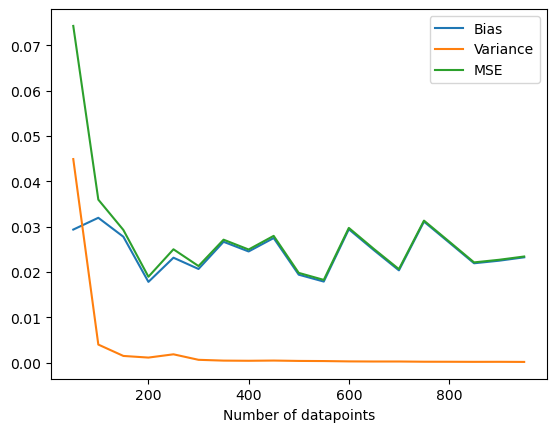

In [12]:
plt.plot(datapoints, bias, label='Bias')
plt.plot(datapoints, variance, label='Variance')
plt.plot(datapoints, error, label='MSE')

plt.xlabel('Number of datapoints')

plt.legend()

So it seems that the variance improves with larger number of data points, but the bias and MSE has a strange behaviour. 

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

**d)** Why do we say that the Ridge method gives a biased model?

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

**h)** What is an advantage of the R2 score over the MSE?


__Answers__

*a)*
We scale the data to make each feature contribute more equally to the model. Taking off the mean of each feature leaves the deviating part, which still leaves room for large features to dominate (but in the right ratio to the others). So we scale to avoid outliers. Take the example where the features are age in years and yearly income, then the values are largerly different, but the income shouldnt contribute more to the model than age. 

*b)*
OLS give equivalent models regardless of scaling because in the minimization problem of OLS, adding a scale only changes the coefficients, not the predictions and thus MSE.

*c)*
In Ridge regression we have a penalty by the hyperparameter, which penalizes large features. Without scaling, the penalty would be larger, and thus it is not invariant to scaling. 

*d)*
We say that Ridge is biased because it intentionally shrinks features. This may reduce the variance, as larger features and penalized more.

*e)*
Scaling the design matrix of OLS will have no effect on the predictions, but scaling the targets will. Say $MSE = 1/n \sum(y-\hat{y})^2$, if the target is scaled (multiplied with some constant), the MSE will be scaled by the same constant squared.

*f)*
$R^2 = 1-  \frac{\sum(y - \tilde{y})^2}{\sum(y - \bar{y})^2}$ or "$1 - \frac{\text{Unexplained variation}}{\text{Total variation}}$"

It measures how much variation in the target is explained by the model compared to just predicting the mean. If the model can predict the variance in the observed values.

*g)*
* R^2=0:The model only predicts the mean of the observed values.
* R^2=0.5: The model predicts 50% of the variance of the predicted values.
* R^2=1: The model perfectly predicts the observed values.

*h)*
MSE is in the units of the observed data, but R^2 is unitless. So R^2 is a score that one can interpret across models and datasets, as it is normalized. Comparison of MSE of a model with different applications must take units into account.